## Data Visualization of Companies Registered to Ministry of Corporate Affairs, 2021.







*Credits to Kaggle Dataset:*

https://www.kaggle.com/bhararthshiviah/monthly-list-of-legal-entities-registered-in-india 
by Bharath Shivaiah.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as mpl

In [2]:
#Read CSV dataset
df= pd.read_csv("2021_april_registered_companies.csv")

In [3]:
#Read mapfile
mapf= "Indian_States.shp"
map_df= gpd.read_file(mapf)

In [4]:
#Some column name alterations for better usage 
df["state"].replace("Dadra & Nagar Haveli", "Dadara & Nagar Havelli", inplace=True)
df["state"].replace("Andaman & Nicobar", "Andaman & Nicobar Island", inplace=True)
df["state"].replace("Daman and Diu", "Daman & Diu", inplace=True)
df["state"].replace("Pondicherry", "Puducherry", inplace=True)
df["state"].replace("Chattisgarh", "Chhattisgarh", inplace=True)
df["state"].replace("Orissa", "Odisha", inplace=True)

df["activity_description"].replace("Manufacturing (Paper & Paper products, Publishing, printingand reproduction of recorded media)", "Manufacturing (Paper,Publishing,etc)", inplace=True)
df["activity_description"].replace("Manufacturing (Metals & Chemicals, and products thereof)", "Manufacturing (Metals & Chemicals\n and products thereof)", inplace=True)

map_df["st_nm"].replace("Arunanchal Pradesh", "Arunachal Pradesh", inplace=True)
map_df["st_nm"].replace("NCT of Delhi", "Delhi", inplace=True)

In [5]:
#Get Number of registrations from each state.
cnt =df["state"].value_counts()

In [6]:
#Create DF with the states as index, and the counts + geometry values of map file as columns
final_df = map_df.set_index("st_nm").join(cnt)
final_df.dropna(inplace=True)
final_df.rename(columns={"state": "count"}, inplace=True)
final_df.sort_values(by="count",ascending=False, inplace=True)

**1.**   Creating Choropleth plot of companies registered from states of India

In [7]:
fig=mpl.figure()

<Figure size 432x288 with 0 Axes>

In [8]:
#Specifically fetching top 6 states for labeling on plot
top=final_df.head(6).copy()
top["rep"]=final_df["geometry"].head(6).representative_point()
top.set_geometry("rep", inplace=True)

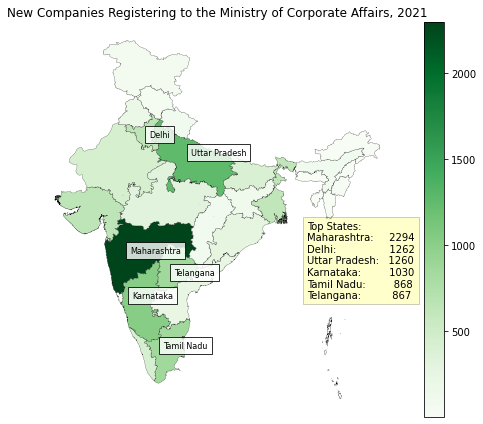

In [13]:
#Plotting the Choropleth
ax=final_df.plot(figsize=(8,6),column="count", legend=True, 
                 cmap="Greens", edgecolor="black", linewidth=0.2)

#Adding the labels and a legend, along with other aesthetics
top6=[]
for x,y,label in zip(top.geometry.x, top.geometry.y, top.index):
    top6.append(mpl.text(x-0.5,y,label, fontsize=8,
                         bbox= dict(facecolor='white', alpha=0.8)))

import adjustText as aT
aT.adjust_text(top6)

#For the legend
legend="Top States:\n" \
       "Maharashtra:     2294\n" \
       "Delhi:                 1262\n" \
       "Uttar Pradesh:   1260\n" \
       "Karnataka:         1030\n" \
       "Tamil Nadu:         868\n" \
       "Telangana:          867"
#Add the legend into a text box
ax.text(0.75,0.3,legend,transform=ax.transAxes,bbox=dict(facecolor="yellow",alpha=0.2))
top.plot(ax=ax,alpha=0)

ax.set_title("New Companies Registering to the Ministry of Corporate Affairs, 2021")
ax.axis("off")

#DISPLAY THE FINAL RESULT
fig=mpl.gcf()
fig.tight_layout()
mpl.show()


**2.** Creating a H-Bar plot showing all the different activites of these companies.

In [14]:
#Get the Activity and number of companies under it
desc_cnt= df["activity_description"].value_counts()

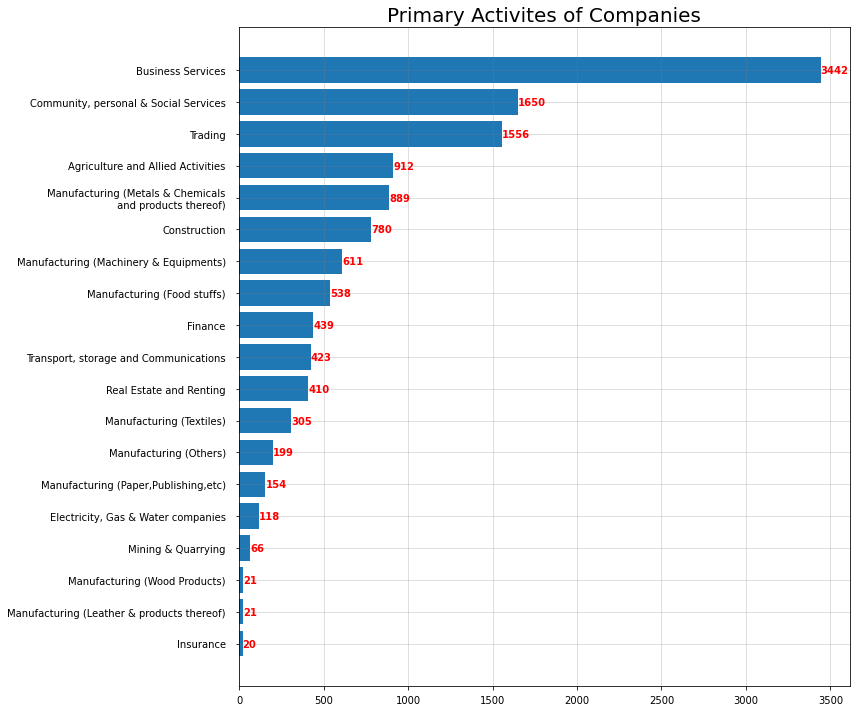

In [16]:
#Plot the above data 
fig2, ax2= mpl.subplots(figsize=(12,10))
ax2.barh(desc_cnt.index,desc_cnt)

#Padding btw bars
ax2.xaxis.set_tick_params(pad=5)
ax2.yaxis.set_tick_params(pad=10)
# Add annotation to bars
for i in ax2.patches:
    mpl.text(i.get_width()+0.8, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='red')
# Add x, y gridlines
ax2.grid(b = True, color ='grey',linestyle ='-', linewidth = 0.5,alpha = 0.5)
ax2.invert_yaxis() #Descending order plot
ax2.set_title("Primary Activites of Companies", loc="center", fontsize=20)

#FINAL RESULT
fig2.tight_layout()
mpl.show()


**3.**  Ploting how the Top 3 activites are spread across the states

In [18]:
#Getting the top 3 activities
top3_act= list(desc_cnt.index[0:3])

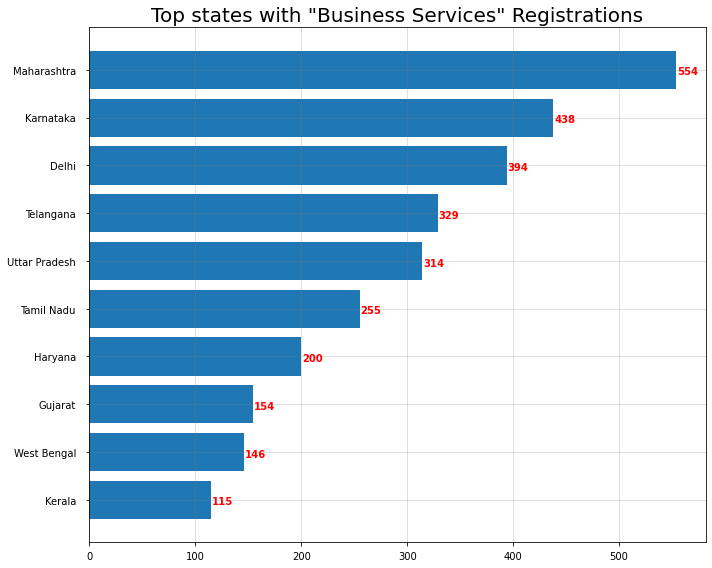

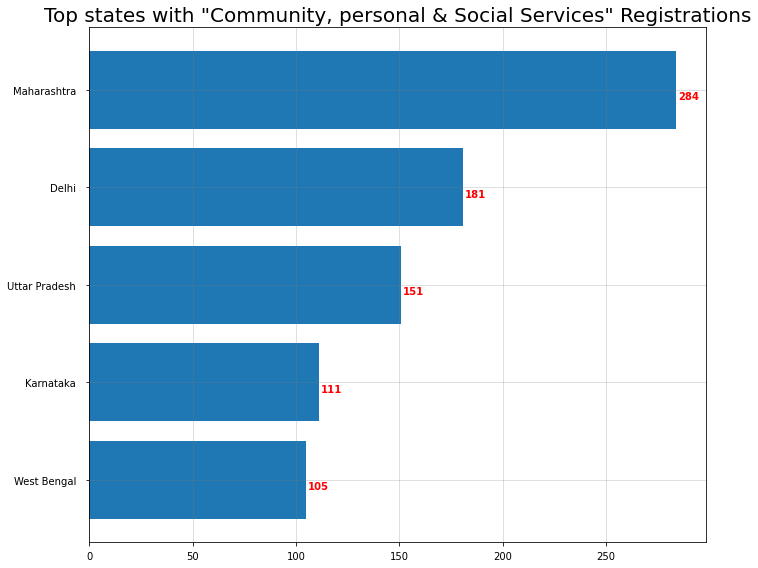

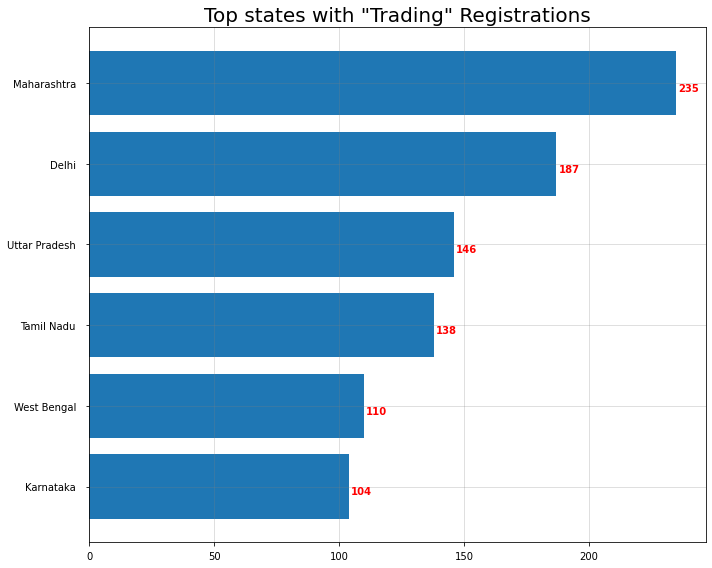

In [19]:
#Creating a H-Bar plot similar 2 the one above, using a For-loop
for act in top3_act:
    #Get the states 
    d= df.loc[ df["activity_description"] == act]["state"].value_counts()
    
    #Plot the above data
    #Taking only states with at least above 100 companies under the activity
    fig2, ax2 = mpl.subplots(figsize=(10, 8))
    ax2.barh(d[d>100].index, d[d>100])

    # Padding btw bars
    ax2.xaxis.set_tick_params(pad=5)
    ax2.yaxis.set_tick_params(pad=10)
    # Add annotation to bars
    for i in ax2.patches:
        mpl.text(i.get_width() + 0.8, i.get_y() + 0.5,
                 str(round((i.get_width()), 2)),
                 fontsize=10, fontweight='bold',
                 color='red')
    # Add x, y gridlines
    ax2.grid(b=True, color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    ax2.invert_yaxis()  # descending order plot
    ax2.set_title(f"Top states with \"{act}\" Registrations", fontsize=20, loc="center")

    #DISPLAY FINAL RESULT
    fig2 = mpl.gcf()
    fig2.tight_layout()
    mpl.show()
    